In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from utils.evaluation import Evaluation

from sklearn.model_selection import GridSearchCV


pd.set_option("display.max_columns", None)

In [2]:
path = "data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,32.0,Alabama,0,0,0,0,1,27.32,5.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,29.0,Alabama,0,1,0,0,0,19.95,5.0,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,18.0,Alabama,0,0,0,0,1,23.76,4.8,160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,41.0,Alabama,0,0,1,0,0,27.32,4.0,159,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,52.0,Alabama,1,0,0,0,0,23.75,6.5,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Split and Target Encoding *location*

In [4]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

## Raw Prediction

In [7]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

### Evaluation

Accuracy: 0.9515


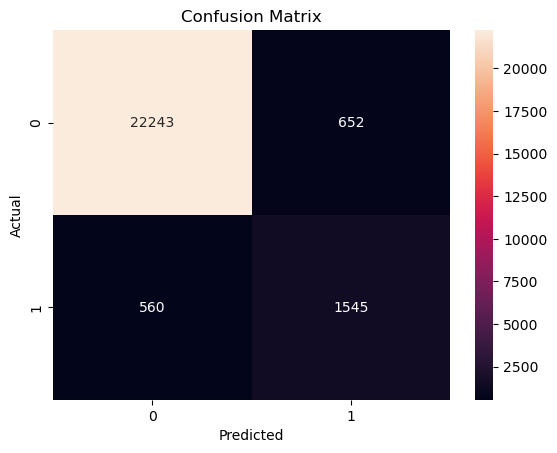

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.70      0.73      0.72      2105

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000



In [8]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

## Tunning Prediction

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

smaller_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

In [13]:
tree = DecisionTreeClassifier(random_state=42)

In [14]:
grid_search = GridSearchCV(tree, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros:\n {grid_search.best_params_}")

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV] END

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3840 fits failed out of a total of 15360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/

### Final Prediction

In [15]:
tree = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=10,
    min_samples_split=15,
    min_samples_leaf=6,
    max_features=None,
    class_weight=None,
    random_state=42
)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

### Evaluation

Accuracy: 0.9714


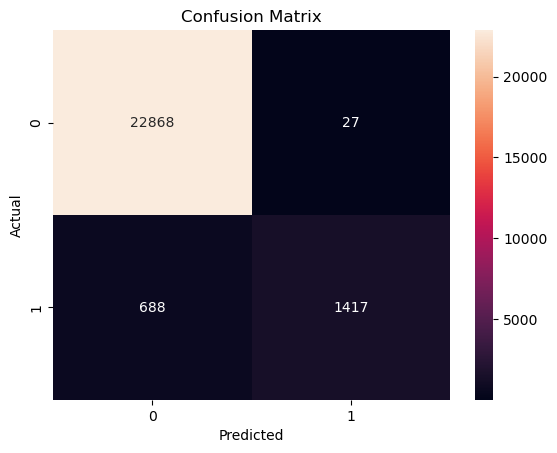

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.98      0.67      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.98      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [16]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)